In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("../out/0702_STARRSEQ_motif_candidates.csv")

In [2]:
import z2_save_jaspar, z1_save_oligos
#LOAD JASPAR & OLIGO DATA
jaspar = z2_save_jaspar.load_jaspar()
oligos,oligos_by_exp = z1_save_oligos.load_oligos_plus()
oligos_by_exp["analysis_group_key"] = oligos_by_exp.exp.copy()
all_obe = oligos_by_exp.reset_index().loc[lambda x:x.mutant_num<5].groupby(["starts","mutant_num","analysis_group_key"]).norm_mu.mean()


In [3]:
#LOADS BIOLOGICAL MOTIFS AND SCANS ALL SUBREGIONS FOR OCCURENCES
from pyfaidx import Fasta
sequences_fa = Fasta('/Users/ben/genomes/GRCh38.primary_assembly.genome.fa')
chrseq = str(sequences_fa["chr22"])
region_bounds=[ 38699734, 39291007]
background = dict([[l,chrseq[region_bounds[0]:region_bounds[1]].count(l) / len(chrseq[region_bounds[0]:region_bounds[1]])] for l in "ATGC"])

In [4]:
top5_ids = pd.Series(df.sort_values("diffval",ascending=False).best_jaspar_id.unique()[:5])

In [5]:
pd.DataFrame(top5_ids).to_csv("../data/0107_sp_top5_ids.csv")

In [6]:
chrseq[region_bounds[0]+285347:][:200][:75]

'TAGTTGAGACTGGGTTTCACCATGTTGGCCAGGCTGGGGAATTCCTGACCTCAGGTGAGTCACCTGCCTTGGCCT'

In [7]:
df.sort_values("diffval",ascending=False)

,index,diffrank,diffval,mutated_sequence,mutant_start,seq,highest_overlapping_wt_oligo,max_delta_wt_oligo,max_delta_mut_oligo,wt_mu,...,best_jaspar_id,best_jaspar_score,jid,best_jaspar_genome_start,best_jaspar_motif_start,best_jaspar_name,best_jaspar_genome_len,best_jaspar_motif_consensus,seqseq,best_jaspar_offset
43,12,43,198.664195,AGGCTGGGGAATTCCTGACCTCAGGTGAGT,285347,AGGCTGGGGAATTCCTGACCTCAGGTGAGT,815,816,5501,206.701695,...,527,14.696348,527,285350,3,RELB,11,GAATTCCCCGG,AGGCTGGGGAATTCCTGACCTCAGGTGAGT,-27
42,19,42,185.481236,CAGGAGTTCAAGACCATCCTGGCTAACATG,348830,CAGGAGTTCAAGACCATCCTGGCTAACATG,961,960,6102,188.710744,...,572,8.625248,572,348832,2,VDR,8,TGAGTTCA,CAGGAGTTCAAGACCATCCTGGCTAACATG,2
41,39,41,119.602439,TTTCAAGGCGATGAGGTCACCCCGGAACTG,555260,TTTCAAGGCGATGAGGTCACCCCGGAACTG,1755,1753,9429,131.402439,...,80,14.442668,80,555266,6,JUND(var.2),15,AAAGATGATGTCATC,TTTCAAGGCGATGAGGTCACCCCGGAACTG,6
40,27,40,97.304281,GCCAGTGTCTCCACGTCCGTCCACCCACCC,453412,GCCAGTGTCTCCACGTCCGTCCACCCACCC,1416,1413,8005,119.529412,...,58,10.493805,58,453422,10,ARNT::HIF1A,8,GGACGTGC,GCCAGTGTCTCCACGTCCGTCCACCCACCC,-20
39,43,39,57.796082,CTCAGGGCGGGAAAGACCCGTGAAGTCATC,591063,CTCAGGGCGGGAAAGACCCGTGAAGTCATC,1883,1880,9968,66.918033,...,95,16.318449,95,591067,4,E2F4,11,GGGCGGGAAGG,CTCAGGGCGGGAAAGACCCGTGAAGTCATC,4
38,20,38,52.261505,ATTCTGTTTCTGGCTGGGCGCGGTGGCTCA,438124,ATTCTGTTTCTGGCTGGGCGCGGTGGCTCA,1242,1242,7294,57.154362,...,77,10.683129,77,438125,1,MEF2C,15,ATGCTAAAAATAGAA,ATTCTGTTTCTGGCTGGGCGCGGTGGCTCA,-29
37,23,37,43.821476,AGCAGAGGCCACTGCTGCTGACCCAGTGCC,442030,AGCAGAGGCCACTGCTGCTGACCCAGTGCC,1309,1310,7572,53.667630,...,55,9.708059,55,442034,4,NR4A2,8,AAGGTCAC,AGCAGAGGCCACTGCTGCTGACCCAGTGCC,4
36,6,36,40.923878,CATGTGATAAGTGACATTGACTCACACATG,88789,CATGTGATAAGTGACATTGACTCACACATG,381,381,3641,48.718750,...,571,11.187700,571,88789,0,TFE3,8,CACGTGAC,CATGTGATAAGTGACATTGACTCACACATG,0
35,21,35,31.194242,GGGGCTGGGCGCGGTGGCTCATGCCTGTAA,441700,GGGGCTGGGCGCGGTGGCTCATGCCTGTAA,1300,1301,7534,38.587500,...,91,10.450463,91,441711,11,FOSL2,11,GGATGACTCAT,GGGGCTGGGCGCGGTGGCTCATGCCTGTAA,11
34,4,34,29.375000,CCACTTCTCAGCTGGGCGACTTCCTTTCTC,55303,CCACTTCTCAGCTGGGCGACTTCCTTTCTC,260,260,3113,41.375000,...,212,10.550923,212,55309,6,NHLH1,10,CGCAGCTGCG,CCACTTCTCAGCTGGGCGACTTCCTTTCTC,-24


In [8]:
oligos

In [9]:
#LOADS MOTIF DATA
motif_oligos_data = pd.read_csv("../out/0722_motif_oligos_data.csv")
motif_oligos_data =  motif_oligos_data.join(jaspar.filter(regex="threshold_.*"),on="jaspar_id")
motif_oligos_data["affine_score"] = motif_oligos_data.score - motif_oligos_data[["threshold_patser","threshold_fdr_005"]].T.min()

# compute candidate mutation start positions for each motif
# note that right now if a motif has multiple possible start positions, this will
# only look at the first
mutant_positions_idx = pd.Index(oligos_by_exp.mutant_start.unique()).sort_values()
motif_position_idxs = motif_oligos_data.position.apply(lambda x:mutant_positions_idx.searchsorted(x)-1)
motif_positions = motif_position_idxs.apply(lambda x: mutant_positions_idx[x])
motif_oligos_data["target_mutant_start_position"] = motif_positions
motif_score_stats = motif_oligos_data.groupby("jaspar_id").apply(lambda x: pd.Series({"score_std":x.affine_score.std(),"score_mean":x.affine_score.mean()}))
motif_oligos_data = motif_oligos_data.join(motif_score_stats,on="jaspar_id")

In [10]:
top5_oligos_data = motif_oligos_data.loc[lambda x: x.jaspar_id.isin(top5_ids)]

In [11]:
motif_oligos_data.to_csv("../data/0101_sp_motif_oligos_data.csv")

In [12]:
motif_oligos_data

,motif_oligo_idx,hit_type,oligo,motif_hit_idx,is_overlapping_wt,is_ablation_mut,is_benign_mut,jaspar_id,position,score,...,seq_actual,threshold_fdr_005,threshold_fdr_05,threshold_balanced,threshold_patser,threshold_bal,affine_score,target_mutant_start_position,score_std,score_mean
0,446,is_ablation_mut,1907,19,NaN,1.0,NaN,7,146,0.879522,...,CAAAGCTCCC,4.238689,-1.389236,NaN,4.337225,-1.756851,-3.359167,120,1.520029,-2.515451
1,1234,is_ablation_mut,1907,55,NaN,1.0,NaN,11,152,1.927536,...,TCCCTG,4.946206,0.772134,NaN,2.357752,0.961349,-0.430215,150,1.500710,-0.225158
2,1868,is_ablation_mut,1907,84,NaN,1.0,NaN,12,167,0.069944,...,TCATGGTAGA,4.991559,0.960490,NaN,2.601372,0.638005,-2.531428,150,1.504190,-0.845387
3,3717,is_ablation_mut,1907,164,NaN,1.0,NaN,16,165,3.322700,...,TCTCATGG,5.116733,1.303661,NaN,1.824573,0.161129,1.498127,150,1.413953,-0.268180
4,4544,is_ablation_mut,1907,197,NaN,1.0,NaN,22,140,0.728233,...,AGGGCACAAAGCTCC,3.983857,-1.188328,NaN,6.029797,0.395918,-3.255625,120,1.326173,-2.510475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276100,487923,is_benign_mut,10092,21824,NaN,NaN,1.0,569,98050,0.822358,...,GAATTGAGGGTA,3.308409,-3.466129,NaN,6.560566,-3.674722,-2.486051,98040,1.364780,-1.541035
2276101,487973,is_benign_mut,10092,21826,NaN,NaN,1.0,570,97950,1.177194,...,CTTTTCTTCT,2.871848,-4.804012,NaN,5.635790,-8.062830,-1.694654,97920,1.858346,-0.364462
2276102,487997,is_benign_mut,10092,21827,NaN,NaN,1.0,570,97978,2.589065,...,TCTTTGTACC,2.871848,-4.804012,NaN,5.635790,-8.062830,-0.282783,97950,1.858346,-0.364462
2276103,488107,is_benign_mut,10092,21833,NaN,NaN,1.0,572,97982,2.065909,...,TGTACCTG,4.354806,-0.979972,NaN,4.303057,-1.149330,-2.237148,97980,1.462494,-2.459543


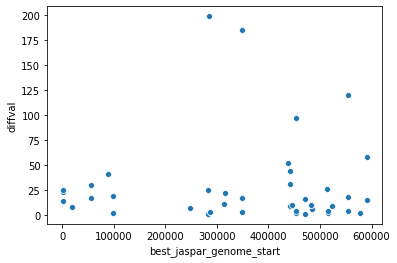

In [13]:
sns.scatterplot( x="best_jaspar_genome_start", y ="diffval", data = df)